# **DiagnoXpert: AI Disease Detection using Symptoms and Healthcare Guide**

B005 Devansh Banka.  
B027 Khushi Jhunjhunwala.  
B029 Haider Kachwalla     
   
  
---



In [ ]:
# importing all necessary libraries
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from nltk.corpus import wordnet
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from itertools import combinations
from collections import Counter
import operator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.regularizers import l2

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
# utlities for pre-processing
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
splitter = RegexpTokenizer(r'\w+')



---



## **Data Preprocessing**

*The dataset used ('dis_sym_dataset_comb.csv') was created by scraping from NHP (https://www.nhp.gov.in/disease-a-z) & Wikipedia*

*Dataset contains 261 diseases and 489 symptoms*

*df_comb -> Dataframe consisting of dataset generated by combining symptoms for each disease.*

*df_norm -> Dataframe consisting of dataset which contains a single row for each diseases with all the symptoms for that corresponding disease.*

In [ ]:
df_comb = pd.read_csv("dis_sym_dataset_comb.csv") # Disease combination
df_norm = pd.read_csv("dis_sym_dataset_norm.csv") # Individual Disease

X = df_comb.iloc[:, 1:]
Y = df_comb.iloc[:, 0:1]

In [ ]:
# Shape of the dataframe
df_comb.shape

(8835, 490)

In [ ]:
# Print first 5 rows
df_comb.head()

,label_dis,abdominal cramp,abdominal distention,abnormal behavior,abnormal bleeding,abnormal sensation,abnormally frequent,abscess,aching,acne,...,wet,wheezing,white patch vaginal discharge,widespread pain,withdrawal occurring stopping,worrying,yellow skin,yellowish coloration skin white eye,yellowish skin,yellowish skin crust
0,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_norm.head()

,label_dis,abdominal cramp,abdominal distention,abnormal behavior,abnormal bleeding,abnormal sensation,abnormally frequent,abscess,aching,acne,...,wet,wheezing,white patch vaginal discharge,widespread pain,withdrawal occurring stopping,worrying,yellow skin,yellowish coloration skin white eye,yellowish skin,yellowish skin crust
0,Abscess,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acquired Capillary Haemangioma of Eyelid,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Acquired Immuno Deficiency Syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Acute encephalitis syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adult Inclusion Conjunctivitis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Number of unique diseases in column label_dis
df_comb.label_dis.nunique()

261

In [ ]:
# Number of unique symptoms
X.columns.nunique()

489

In [ ]:
# Count of Missing Values
df_comb.isnull().sum()

,0
label_dis,0
abdominal cramp,0
abdominal distention,0
abnormal behavior,0
abnormal bleeding,0
...,...
worrying,0
yellow skin,0
yellowish coloration skin white eye,0
yellowish skin,0


In [ ]:
# One-hot encode the disease labels
onehot_encoder = OneHotEncoder(sparse_output=False)
Y_encoded = onehot_encoder.fit_transform(Y)
print(Y_encoded.shape)

(8835, 261)




---



## **Building the Model**

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Compute class weights
y_integers = np.argmax(Y_encoded, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_integers), y=y_integers)
class_weights = dict(enumerate(class_weights))

In [ ]:
# Build the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(Y_encoded.shape[1], activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1932 - loss: 4.8964 - val_accuracy: 0.4547 - val_loss: 2.8905
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4341 - loss: 2.9787 - val_accuracy: 0.5891 - val_loss: 2.3546
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5125 - loss: 2.6334 - val_accuracy: 0.6245 - val_loss: 2.0994
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5492 - loss: 2.3903 - val_accuracy: 0.6761 - val_loss: 1.9157
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6072 - loss: 2.1355 - val_accuracy: 0.7093 - val_loss: 1.7486
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6257 - loss: 2.0487 - val_accuracy: 0.7249 - val_loss: 1.6388
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6491 - loss: 1.9503 - val_accuracy: 0.7475 - val_loss: 1.5722
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6507 - loss: 1.8830 - val_acc

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.8710


In [ ]:
# Predict labels for the test set
Y_pred = model.predict(X_test)

# Convert one-hot encoded predictions and true labels back to integers
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_true_classes, Y_pred_classes)
print(f"Confusion Matrix:\n{conf_matrix}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 0]]


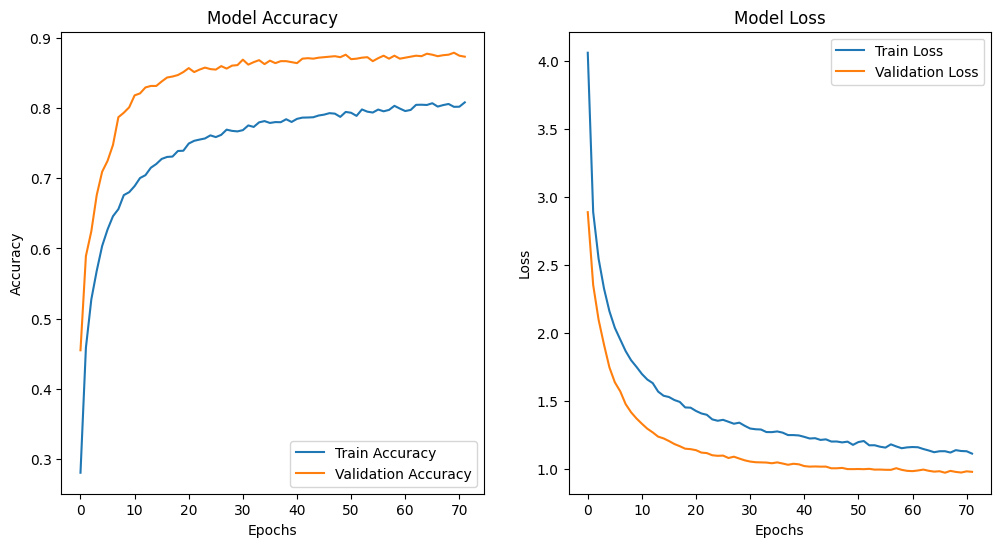

In [ ]:
# Plot accuracy curves
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# List of symptoms
dataset_symptoms = list(X.columns)



---



## **Symptoms initially taken from user as input**

In [ ]:

# Taking symptoms from user as input
user_symptoms = str(input("Please enter symptoms separated by comma(,):\n")).lower().split(',')

# Preprocessing the input symptoms
processed_user_symptoms = []
for sym in user_symptoms:
    sym = sym.strip()
    sym = sym.replace('-', ' ')
    sym = sym.replace("'", '')
    sym = ' '.join([lemmatizer.lemmatize(word) for word in splitter.tokenize(sym)])
    processed_user_symptoms.append(sym)

Please enter symptoms separated by comma(,):
memory loss, cannot remember, bad memory, mood swings


In [ ]:
# This function returns the list of synonyms of the input word from thesaurus.com (https://www.thesaurus.com/) and wordnet (https://www.nltk.org/howto/wordnet.html)
def synonyms(term):
    synonyms = []
    response = requests.get('https://www.thesaurus.com/browse/{}'.format(term))
    soup = BeautifulSoup(response.content,  "html.parser")
    try:
        container=soup.find('section', {'class': 'MainContentContainer'})
        row=container.find('div',{'class':'css-191l5o0-ClassicContentCard'})
        row = row.find_all('li')
        for x in row:
            synonyms.append(x.get_text())
    except:
        None
    for syn in wordnet.synsets(term):
        synonyms+=syn.lemma_names()
    return set(synonyms)

In [ ]:
# Taking each user symptom and finding all its synonyms and appending it to the pre-processed symptom string
user_symptoms = []
for user_sym in processed_user_symptoms:
    user_sym = user_sym.split()
    str_sym = set()
    for comb in range(1, len(user_sym)+1):
        for subset in combinations(user_sym, comb):
            subset = ' '.join(subset)
            subset = synonyms(subset)
            str_sym.update(subset)
    str_sym.add(' '.join(user_sym))
    user_symptoms.append(' '.join(str_sym).replace('_', ' '))

print("After query expansion done by using the symptoms entered")
print(user_symptoms)

After query expansion done by using the symptoms entered
['store red ink expiration memory board red storage memory loss going remembering personnel casualty memory retentiveness deprivation computer storage retention passing release retentivity loss computer memory departure exit', 'commemorate retrieve think back commend recollect think of remember think recall call up cannot remember call back', 'store bad badly uncollectible unsound risky memory board defective storage forged sorry bad memory tough big remembering memory badness spoiled retentiveness unfit computer storage retention speculative spoilt retentivity computer memory regretful high-risk', 'humor swing over temper lilt dangle golf shot vacillation climate modality golf stroke swing swing out cut swing music mood baseball swing sway mode drop jive humour sweep mood swing swinging get around']


In [ ]:
# Find matching symptoms
found_symptoms = set()
for idx, data_sym in enumerate(dataset_symptoms):
    data_sym_split = data_sym.split()
    for user_sym in user_symptoms:
        count = 0
        for symp in data_sym_split:
            if symp in user_sym.split():
                count += 1
        if count / len(data_sym_split) > 0.5:
            found_symptoms.add(data_sym)
found_symptoms = list(found_symptoms)
print("Found symptoms:")
print(found_symptoms)

Found symptoms:
['mood swing', 'stroke', 'back', 'red']


## **Prompt the user to select the relevant symptoms**

In [ ]:
# Print all found symptoms
print("Top matching symptoms from your search!")
for idx, symp in enumerate(found_symptoms):
    print(idx,":",symp)

# Show the related symptoms found in the dataset and ask user to select among them
select_list = input("\nPlease select the relevant symptoms. Enter indices (separated-space):\n").split()

# Find other relevant symptoms from the dataset based on user symptoms based on the highest co-occurance with the ones that is input by the user
dis_list = set()
final_symp = []
counter_list = []
for idx in select_list:
    symp=found_symptoms[int(idx)]
    final_symp.append(symp)
    dis_list.update(set(df_norm[df_norm[symp]==1]['label_dis']))

for dis in dis_list:
    row = df_norm.loc[df_norm['label_dis'] == dis].values.tolist()
    row[0].pop(0)
    for idx,val in enumerate(row[0]):
        if val!=0 and dataset_symptoms[idx] not in final_symp:
            counter_list.append(dataset_symptoms[idx])

Top matching symptoms from your search!
0 : mood swing
1 : stroke
2 : back
3 : red

Please select the relevant symptoms. Enter indices (separated-space):
0


**To find symptoms which generally co-occur, for example with symptoms like cough, headache generally happens hence they co-occur.**

In [ ]:
# Symptoms that co-occur with the ones selected by user
dict_symp = dict(Counter(counter_list))
dict_symp_tup = sorted(dict_symp.items(), key=operator.itemgetter(1),reverse=True)
print(dict_symp_tup)

[('difficulty remembering recent event', 1), ('disorientation', 1), ('problem language', 1)]


**User is presented with a list of co-occuring symptoms to select from and is performed iteratively to recommend more possible symptoms based on the similarity to the previously entered symptoms.**

In [ ]:
# Iteratively, suggest top co-occuring symptoms to the user and ask to select the ones applicable
found_symptoms=[]
count=0
for tup in dict_symp_tup:
    count+=1
    found_symptoms.append(tup[0])
    if count%5==0 or count==len(dict_symp_tup):
        print("\nCommon co-occuring symptoms:")
        for idx,ele in enumerate(found_symptoms):
            print(idx,":",ele)
        select_list = input("Do you have have of these symptoms? If Yes, enter the indices (space-separated), 'no' to stop, '-1' to skip:\n").lower().split();
        if select_list[0]=='no':
            break
        if select_list[0]=='-1':
            found_symptoms = []
            continue
        for idx in select_list:
            final_symp.append(found_symptoms[int(idx)])
        found_symptoms = []


Common co-occuring symptoms:
0 : difficulty remembering recent event
1 : disorientation
2 : problem language
Do you have have of these symptoms? If Yes, enter the indices (space-separated), 'no' to stop, '-1' to skip:
0 1


## **Final Symptom list**

In [ ]:
# Create query vector based on symptoms selected by the user
print("\nFinal list of Symptoms that will be used for prediction:")
sample_x = np.zeros((1, len(dataset_symptoms)))
for val in final_symp:
    print(val)
    sample_x[0, dataset_symptoms.index(val)] = 1


Final list of Symptoms that will be used for prediction:
mood swing
difficulty remembering recent event
disorientation


**Prediction of disease**

In [ ]:
# Predict disease
prediction = model.predict([sample_x])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


**Show top k diseases and their probabilities to the user.**

In [ ]:
k = 5
diseases = onehot_encoder.categories_[0]
topk = prediction[0].argsort()[-k:][::-1]

## **Showing the list of top 5 diseases to the user with their prediction probabilities.**

*For getting information about the suggested treatments, user can enter the corresponding index to know more details.*

In [ ]:
import re
from googlesearch import search
import warnings
warnings.filterwarnings("ignore")
import requests
from bs4 import BeautifulSoup

# Take input a disease and return the content of wikipedia's infobox for that specific disease

def diseaseDetail(term):
    diseases=[term]
    ret=term+"\n"
    for dis in diseases:
        # search "disease wikipedia" on google
        query = dis+' wikipedia'
        for sr in search(query,tld="co.in",stop=10,pause=0.5):
            # open wikipedia link
            match=re.search(r'wikipedia',sr)
            filled = 0
            if match:
                wiki = requests.get(sr,verify=False)
                soup = BeautifulSoup(wiki.content, 'html5lib')
                # Fetch HTML code for 'infobox'
                info_table = soup.find("table", {"class":"infobox"})
                if info_table is not None:
                    # Preprocess contents of infobox
                    for row in info_table.find_all("tr"):
                        data=row.find("th",{"scope":"row"})
                        if data is not None:
                            symptom=str(row.find("td"))
                            symptom = symptom.replace('.','')
                            symptom = symptom.replace(';',',')
                            symptom = symptom.replace('<b>','<b> \n')
                            symptom=re.sub(r'<a.*?>','',symptom) # Remove hyperlink
                            symptom=re.sub(r'</a>','',symptom) # Remove hyperlink
                            symptom=re.sub(r'<[^<]+?>',' ',symptom) # All the tags
                            symptom=re.sub(r'\[.*\]','',symptom) # Remove citation text
                            symptom=symptom.replace("&gt",">")
                            ret+=data.get_text()+" - "+symptom+"\n"
#                            print(data.get_text(),"-",symptom)
                            filled = 1
                if filled:
                    break
    return ret

In [ ]:
print(f"\nTop {k} diseases predicted based on symptoms")
topk_dict = {}
# Show top 10 highly probable diseases to the user.
for idx, t in enumerate(topk):
    disease_name = diseases[t]
    prob = prediction[0][t] * 100
    print(f"{idx} Disease name: {disease_name}, Probability: {prob:.2f}%")
    topk_dict[idx] = t

select = input("\nMore details about the disease? Enter index of disease or '-1' to discontinue and close the system:\n")
if select != '-1':
    dis = diseases[topk_dict[int(select)]]
    print()
    print(diseaseDetail(dis))


Top 5 diseases predicted based on symptoms
0 Disease name: Alzheimer, Probability: 89.77%
1 Disease name: Autism, Probability: 4.86%
2 Disease name: Perennial Allergic Conjunctivitis, Probability: 1.74%
3 Disease name: Raynaud's Phenomenon, Probability: 0.97%
4 Disease name: Vitamin B12 Deficiency, Probability: 0.57%

More details about the disease? Enter index of disease or '-1' to discontinue and close the system:
0

Alzheimer
Other names -  Alzheimer's dementia 
Pronunciation -   mw-parser-output plainlist ol,mw-parser-output plainlist ul{line-height:inherit,list-style:none,margin:0,padding:0}mw-parser-output plainlist ol li,mw-parser-output plainlist ul li{margin-bottom:0}      /  ˈ  æ  l  t  s  h  aɪ  m  ər  z  /  ,   mw-parser-output IPA-label-small{font-size:85%}mw-parser-output references IPA-label-small,mw-parser-output infobox IPA-label-small,mw-parser-output navbox IPA-label-small{font-size:100%}  US also   /  ˈ  ɑː  l  t  s  -/       
Specialty -  Neurology 
Symptoms -  Me